# Times Series Data Visualization

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get data
df = pd.read_csv("./data/daily-minimum-temperatures-in-melborn.csv",
                index_col=0, parse_dates=True)
# rename columns
df.columns = ['daily-min-temperature']
# get head of dataframe
df.head()

,daily-min-temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [3]:
# data preprocessing - data cleaning
# remove extra ? from data
df["daily-min-temperature"] = df["daily-min-temperature"].apply(lambda item: item.replace("?",""))
df["daily-min-temperature"] = pd.to_numeric(df['daily-min-temperature'])

<AxesSubplot:xlabel='Date'>

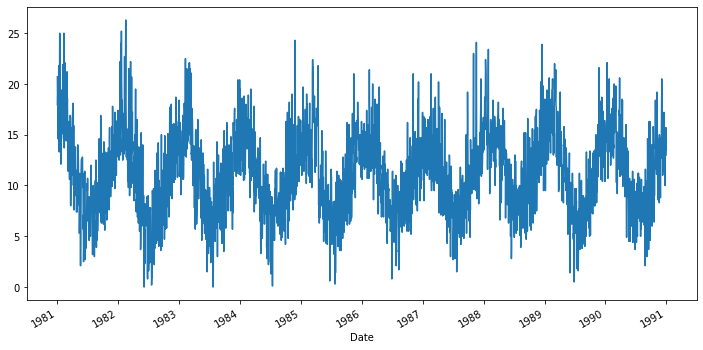

In [4]:
# plot times series data using .plot method of dataframe (series)
df['daily-min-temperature'].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

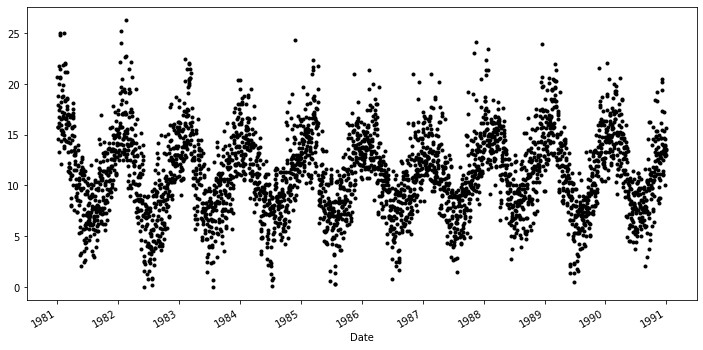

In [5]:
df['daily-min-temperature'].plot(figsize=(12,6), style='k.')

In [6]:
# visualize each year series separately
groups = df.groupby(pd.Grouper(freq='A'))
year_df = pd.DataFrame()
for name, group in groups:
    year_df[name.year] = group.values.reshape(-1)
    
year_df

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


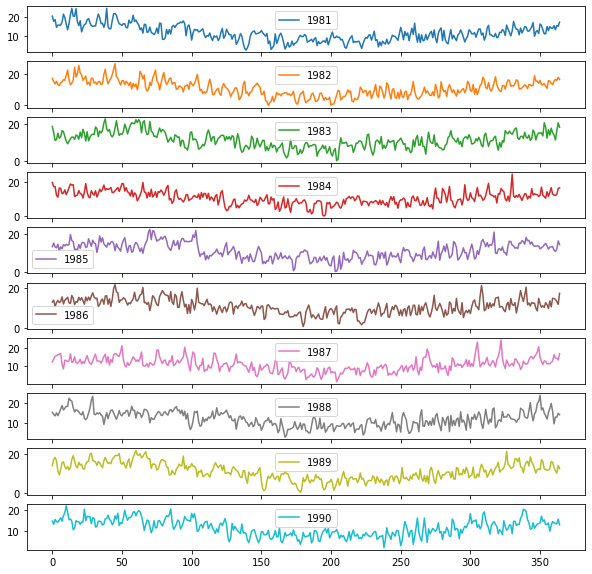

In [7]:
_ = year_df.plot(figsize=(10,10), subplots=True)

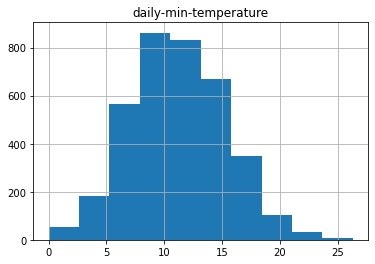

In [8]:
# histogram
_ = df.hist()

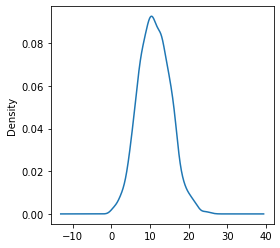

In [9]:
# kde
_ = df['daily-min-temperature'].plot(kind='kde', figsize=(4,4))

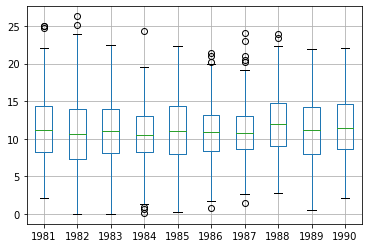

In [10]:
# boxplot of year_df
_ = year_df.boxplot()

In [11]:
# plot temperatures in months of one year
monthly_groups = df.loc['1990'].groupby(pd.Grouper(freq='M'))
list_of_df = []
for name, group in monthly_groups:
#     print(f"month = {name.month}")
#     print(group.values.reshape(-1))
    month_df = pd.DataFrame(group.values.reshape(-1))
    list_of_df.append(month_df)
#     print("================")
    
months_df = pd.concat(list_of_df, axis=1)

In [12]:
months_df.columns = [*range(1,13)]

In [13]:
months_df

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.8,12.0,19.3,15.3,13.0,9.7,7.4,6.8,6.0,11.3,15.4,13.3
1,13.3,12.2,17.3,14.7,13.9,8.2,7.3,9.8,9.5,10.5,11.8,13.2
2,15.6,14.8,19.0,11.0,12.6,8.4,7.7,5.7,8.6,9.9,13.0,16.2
3,14.5,14.8,19.8,12.2,14.3,8.5,7.7,8.6,7.6,11.0,11.1,17.3
4,14.3,14.4,19.3,14.2,16.0,10.4,9.3,10.6,10.4,14.0,12.5,20.5
5,15.3,12.9,17.2,17.0,13.3,6.8,4.4,7.8,10.3,9.2,18.3,20.2
6,16.4,13.4,14.2,15.8,7.0,6.0,5.7,7.7,7.5,9.8,19.2,19.4
7,14.8,15.9,10.3,15.2,4.9,6.6,10.2,8.6,3.0,6.0,15.4,15.5
8,17.4,16.1,13.0,15.1,6.9,7.8,10.2,6.5,5.3,9.8,13.1,14.1
9,18.8,17.6,15.3,14.7,13.7,10.3,9.3,6.9,10.5,9.2,11.5,11.0


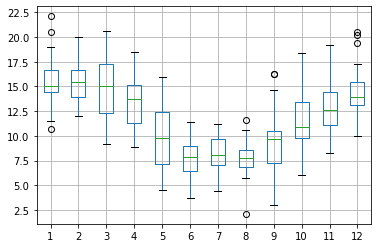

In [14]:
_ = months_df.boxplot()

<AxesSubplot:>

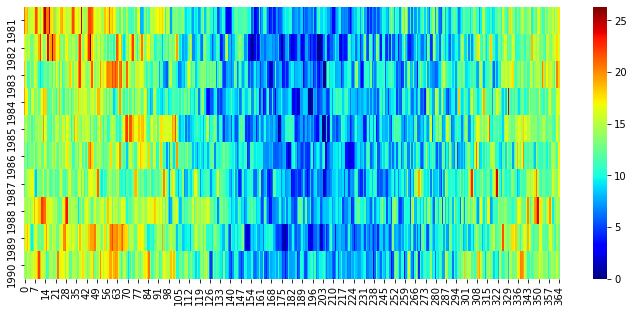

In [15]:
# heatmap for year_df
fig = plt.figure(figsize=(12,5))
sns.heatmap(year_df.T, cmap='jet')

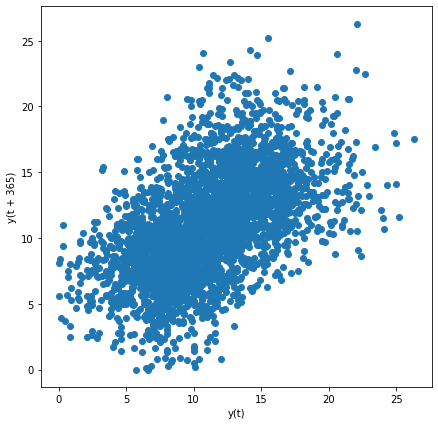

In [16]:
# lag plot
from pandas.plotting import lag_plot

fig = plt.figure(figsize=(7,7))
_ = lag_plot(df['daily-min-temperature'], lag=365)
_ = plt.show()

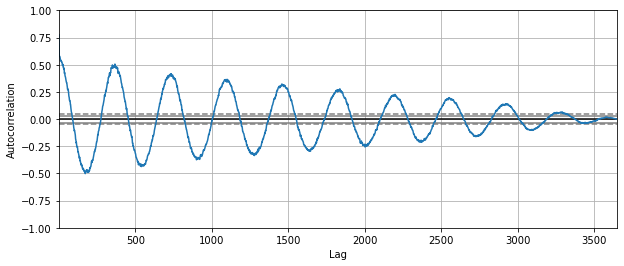

In [17]:
# autocorrelation
from pandas.plotting import autocorrelation_plot
fig = plt.figure(figsize=(10,4))
_ = autocorrelation_plot(df['daily-min-temperature'])
_ = plt.show()